# Introduction

This project analyses the EEG Eye State dataset to classify whether a subject's eyes were open or closed.

# Data loading

Importing necessary modules and packages:

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

Importing data file from an .arff file and converting into a pandas dataframe.

In [27]:
data, meta = arff.loadarff("EEG Eye State.arff")
df = pd.DataFrame(data)

df.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,b'0'
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,b'0'
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,b'0'
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,b'0'
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,b'0'


The last column must be converted to integer type so that the labels are clearly 0 (eyes open) or 1 (eyes closed), since *.arff* sometimes presents data as objects.

In [28]:
df["eyeDetection"] = df["eyeDetection"].astype(int)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AF3           14980 non-null  float64
 1   F7            14980 non-null  float64
 2   F3            14980 non-null  float64
 3   FC5           14980 non-null  float64
 4   T7            14980 non-null  float64
 5   P7            14980 non-null  float64
 6   O1            14980 non-null  float64
 7   O2            14980 non-null  float64
 8   P8            14980 non-null  float64
 9   T8            14980 non-null  float64
 10  FC6           14980 non-null  float64
 11  F4            14980 non-null  float64
 12  F8            14980 non-null  float64
 13  AF4           14980 non-null  float64
 14  eyeDetection  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832,0.448798
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043,0.497388
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000,0.000000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000,0.000000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000,0.000000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000,1.000000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000,1.000000


The dataset has 14 EEG channels plus one label column. There are no missing values and feature ranges vary between channels. The label column was converted to integer (0 or 1).

# Exploratory Data Analysis

**Checking class balance**

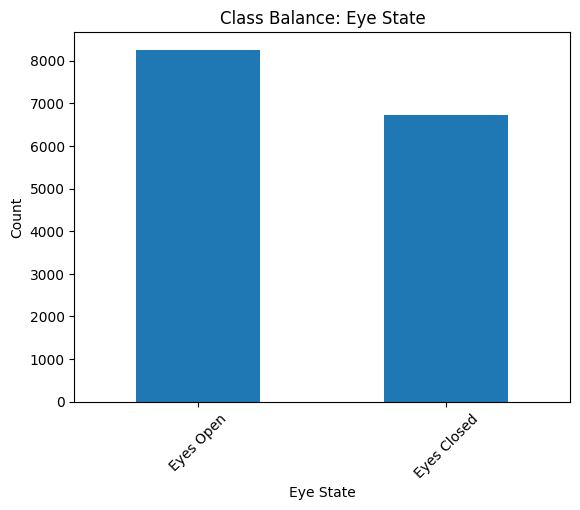

,Percentage (%)
Eyes Open,55.12
Eyes Closed,44.88


In [29]:
df["eyeDetection"].value_counts().sort_index().plot(kind="bar")
plt.title("Class Balance: Eye State")
plt.xlabel("Eye State")
plt.ylabel("Count")
plt.xticks([0, 1], ['Eyes Open', 'Eyes Closed'],rotation=45)
plt.show()


counts = df["eyeDetection"].value_counts(normalize=True).sort_index() * 100
counts.index = ["Eyes Open", "Eyes Closed"]
counts = counts.round(2).rename("Percentage (%)").to_frame()
counts

The dataset is approximately balanced across classes.

**Exploring the distribution of (some) EEG channels**

Logarithmical scale was used to better visualize the distributions:

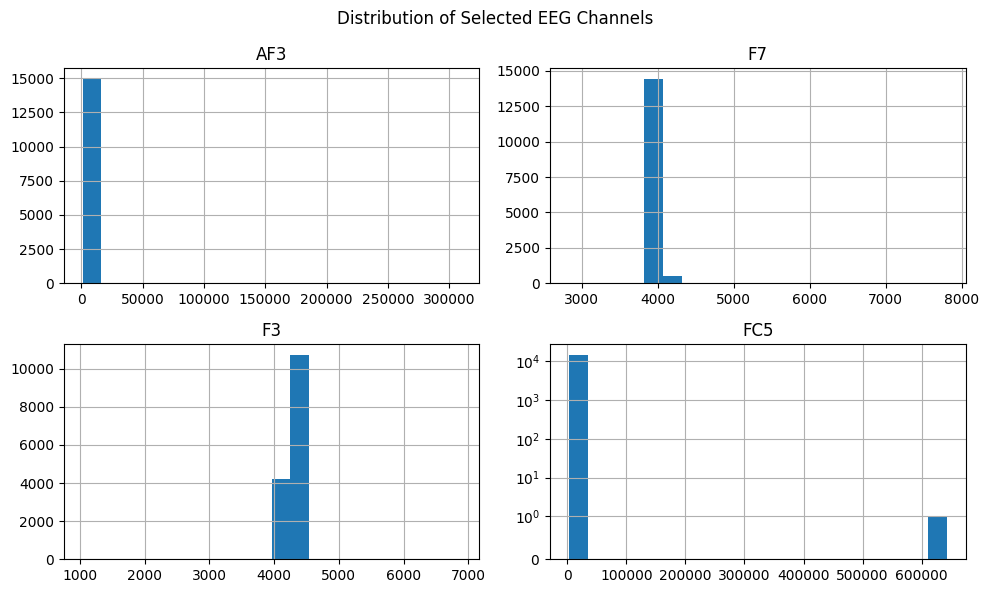

In [30]:
channels = df.columns[:4]


df[channels].hist(figsize=(10, 6), bins=20)
plt.suptitle("Distribution of Selected EEG Channels")
plt.yscale('symlog', linthresh=1)
plt.tight_layout()

plt.show()

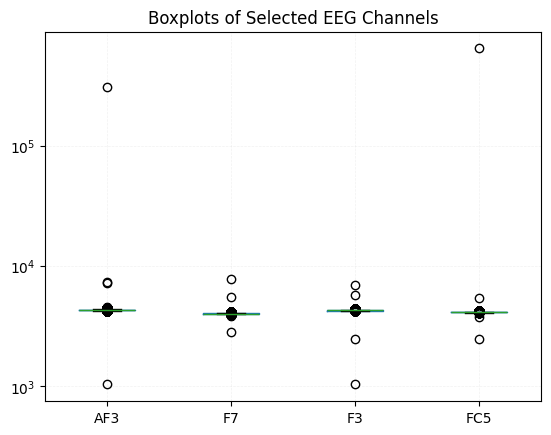

In [31]:
df[channels].boxplot()
plt.title("Boxplots of Selected EEG Channels")
plt.yscale('symlog', linthresh=1)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.show()

Most EEG values are clustered in a specific range, with only a few extreme values. This shows the signals appear relatively stable, but differences in scale between channels may justify feature normalisation before modelling.

**Correlation Heatmap**

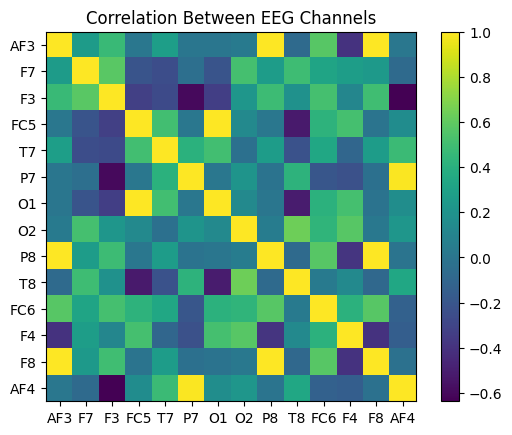

In [32]:
corr = df.drop(columns=["eyeDetection"]).corr()

plt.imshow(corr)
plt.colorbar()
plt.title("Correlation Between EEG Channels")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Several EEG channels are moderately correlated with each other, meaning they record similar patterns of brain activity. This is expected because of the positioning of electrodes during testing.

The heatmap also shows some weak or negative correlations, showing that not all channels behave the same, and shows that the features are not independent, which can affect the model.

**Time plot**

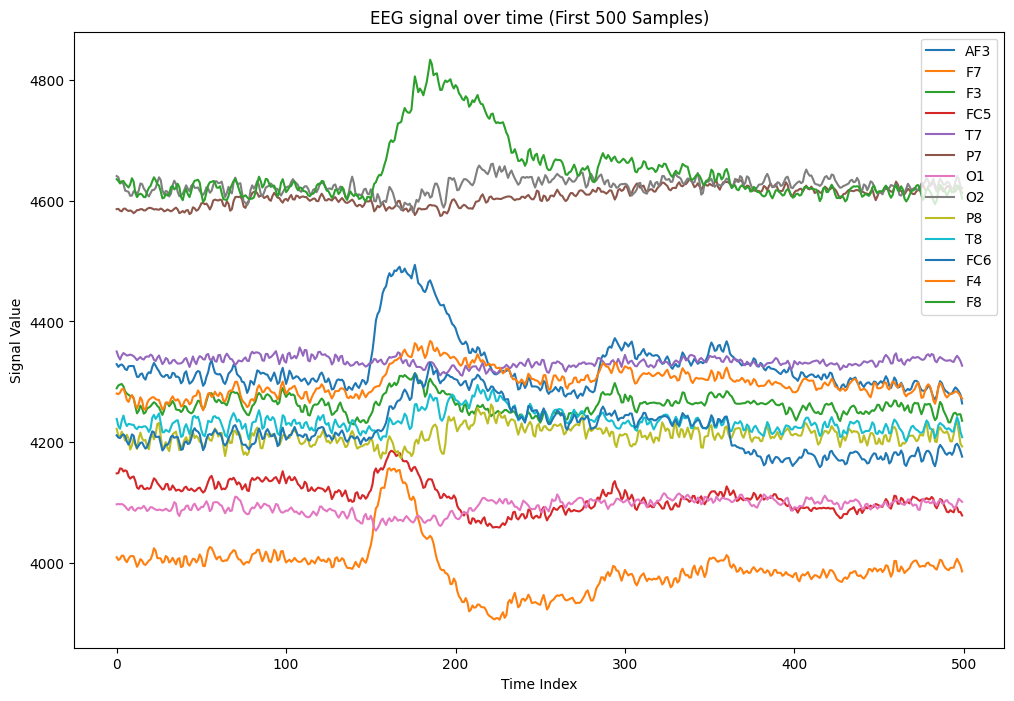

In [33]:
plt.figure(figsize=(12, 8))

plt.plot(df.iloc[:500, 0], label=df.columns[0])
plt.plot(df.iloc[:500, 1], label=df.columns[1])
plt.plot(df.iloc[:500, 2], label=df.columns[2])
plt.plot(df.iloc[:500, 3], label=df.columns[3])
plt.plot(df.iloc[:500, 4], label=df.columns[4])
plt.plot(df.iloc[:500, 5], label=df.columns[5])
plt.plot(df.iloc[:500, 6], label=df.columns[6])
plt.plot(df.iloc[:500, 7], label=df.columns[7])
plt.plot(df.iloc[:500, 8], label=df.columns[8])
plt.plot(df.iloc[:500, 9], label=df.columns[9])
plt.plot(df.iloc[:500, 10], label=df.columns[10])
plt.plot(df.iloc[:500, 11], label=df.columns[11])
plt.plot(df.iloc[:500, 12], label=df.columns[12])

plt.title("EEG signal over time (First 500 Samples)")
plt.xlabel("Time Index")
plt.ylabel("Signal Value")
plt.legend()
plt.show()

Overall, the EEG signals change gradually over time, and neighbouring samples look very similar to each other. This means consecutive rows in the dataset are highly correlated.

**Comparison of EEG channels data by eye state**

Plotting the average value of each EEG channel when the eyes are open versus closed helps compare the differences between the two states and determine if eye state may influence EEG activity.

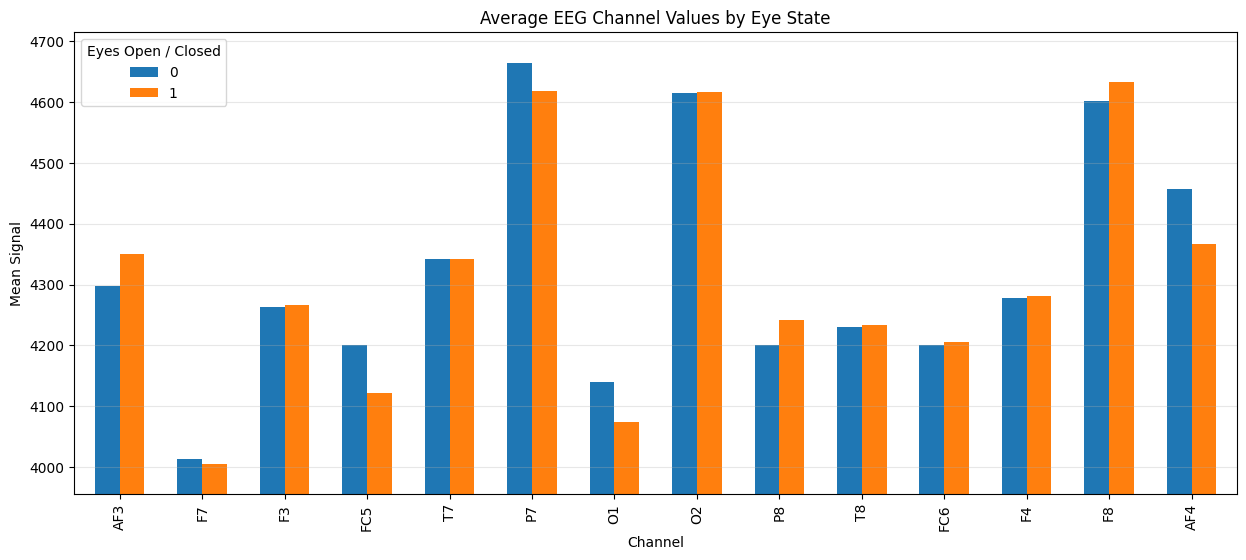

In [34]:
means = df.groupby(df["eyeDetection"]).mean().T
means.plot(kind='bar', figsize=(15, 6), width=0.6)
plt.title("Average EEG Channel Values by Eye State")
plt.xlabel("Channel")
plt.ylabel("Mean Signal")
plt.legend(title="Eyes Open / Closed")
plt.grid(axis='y', alpha=0.3)
plt.ylim(means.min().min() - 50, means.max().max() + 50)
plt.show()

Further analysis of the *relative* difference between states:

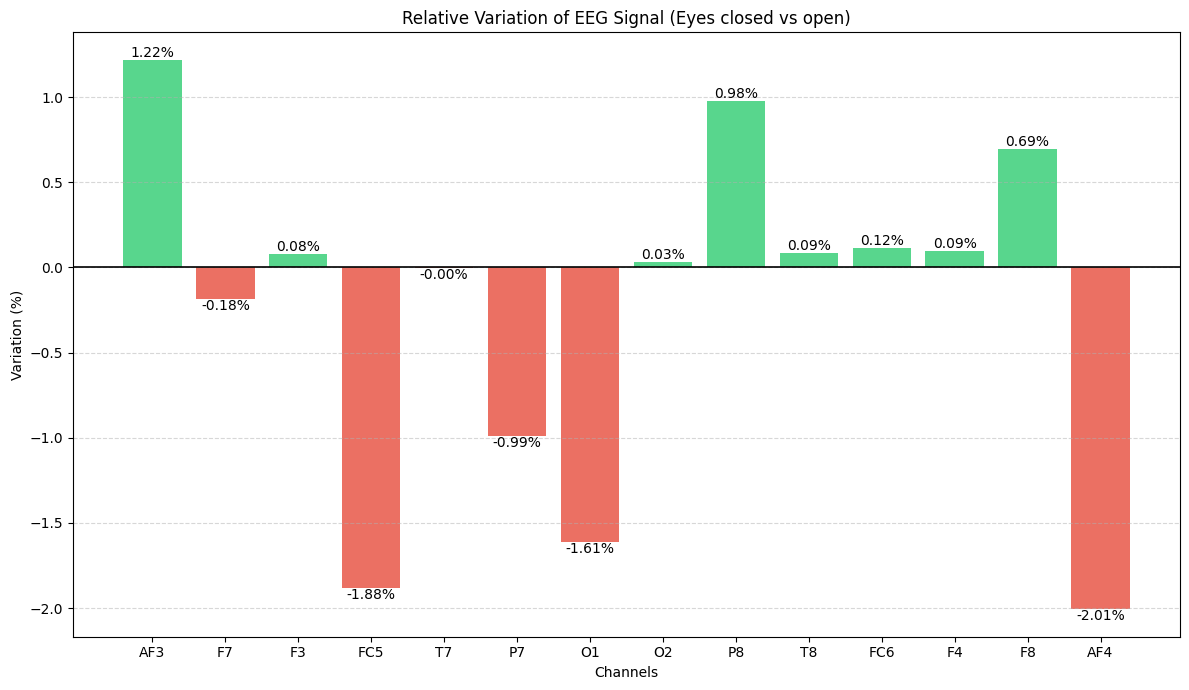

In [35]:
diff = ((means[1] - means[0]) / means[0]) * 100
cores = ['#2ecc71' if x > 0 else '#e74c3c' for x in diff]

plt.figure(figsize=(12, 7))
bars = plt.bar(diff.index, diff, color=cores, alpha=0.8)
plt.axhline(0, color='black', linewidth=1.2, linestyle='-')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%',
             va='bottom' if yval > 0 else 'top', ha='center')

plt.title("Relative Variation of EEG Signal (Eyes closed vs open)")
plt.ylabel("Variation (%)")
plt.xlabel("Channels")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


Some channels show slightly higher values for eyes closed, while others show the opposite. Because the difference between states is modest, predicting eye state from raw EEG signals may be difficult. Furthermore, the plots show that some EEG channels change more than others, suggesting that certain channels may be more informative to eye state condition.

# Train–test split



Defining the features and target:

In [36]:
X = df.drop("eyeDetection", axis=1)
y = df["eyeDetection"]


Spliting the data between train and test:

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=13,
    stratify=y
)

# Baseline model

Creating a linear model to predict eye-open status

In [38]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)


Evaluating:

In [39]:
accuracy_score(y_test, y_pred_lr)
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.64      0.76      0.70      1651
           1       0.62      0.48      0.54      1345

    accuracy                           0.63      2996
   macro avg       0.63      0.62      0.62      2996
weighted avg       0.63      0.63      0.63      2996



The linear classifier achieved an accuracy of 63%. Performance differed across classes: recall for class 0 was 76%, whereas recall for class 1 was only 48%, indicating that the model failed to identify a substantial proportion of true class-1 observations. These results indicate that a simple linear model is likely insufficient to capture the structure of EEG features.

# Random Forest Model

In [40]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=13
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_score(y_test, y_pred_rf)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1651
           1       0.94      0.88      0.91      1345

    accuracy                           0.92      2996
   macro avg       0.92      0.92      0.92      2996
weighted avg       0.92      0.92      0.92      2996



The Random Forest model achieved an overall accuracy of 92%. Recall was high for both classes (95 and 88%), indicating that the model rarely misses true states.

Compared to the linear model, the Random Forest substantially improved predictive accuracy, suggesting that non-linear relationships among EEG features are important for distinguishing eye state.

However, it is important to perform cross-validation to confirm model accuracy.

**Confusion matrix**

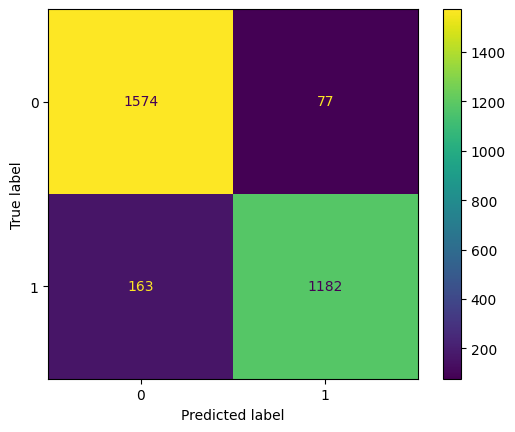

In [41]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf
)

There are few false negatives and few false positives, which is a great evidence in favor of the model.

**Feature importance**

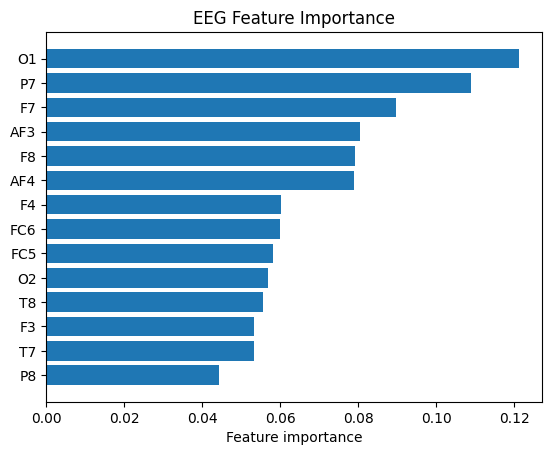

In [42]:
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel("Feature importance")
plt.title("EEG Feature Importance")
plt.show()


Some electrodes contribute more to the model, such as O1 and P7. This indicates that there are spatial differences in EEG signals that influence the data.

# Cross validation and finding leakage

In [43]:
cv_scores = cross_val_score(
    rf, X, y, cv=5, scoring="accuracy"
)

print(f"Scores per fold: {cv_scores}")
print(f"Mean Accuracy:   {cv_scores.mean():.2%} ")
print(f"Standard Dev:    {cv_scores.std():.2%}")

Scores per fold: [0.56308411 0.57510013 0.38818425 0.42323097 0.51935915]
Mean Accuracy:   49.38% 
Standard Dev:    7.51%


The cross validation resulted in 49% accuracy, which shows the model is performing similarly to random guessing. **High training score** with **low cross-validation score** is a sign of overfitting, where the model has memorized the training data but struggles with new data.

Since the cross-validation was done by dividing the data into folds without shuffling the data, it is possible that the model was relying on similarity between neighbouring time points, not on true eye-state patterns.

Testing the **data leakage** hypothesis:

In [46]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=13)

cv_new = cross_val_score(rf, X, y, cv=cv)

print(f"Scores per fold: {cv_new}")
print(f"Mean Accuracy:   {cv_new.mean():.2%} ")
print(f"Standard Dev:    {cv_new.std():.2%}")


Scores per fold: [0.93324433 0.92556742 0.9305741  0.93190921 0.92656876]
Mean Accuracy:   92.96% 
Standard Dev:    0.30%


Performance went back near 90%, which indicates that temporal structure in the dataset was causing the overly optimistic results.

Due to the nature of EEG data, very similar neighbouring EEG samples were split between train and test when shuffling the data. This is called **temporal leakage**, which leads the model to "know" future information via the training data, resulting in overly optimistic performance metrics during validation.

With the cross-validation without shuffle, the model performed with 50% accuracy, near chance level, which is more realistic.

# Correcting to avoid temporal leakage

The data needs to be treated as a **time series**, not shuffling when performing train-test split.

New packages necessary for correcting and cross verifying the model:

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

**Time-aware train-test split**: no shuffling

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False
)

**New Random Forest model**: Using a pipeline ensures correct validation practice.

In [49]:
pipe = Pipeline([
    # ('scaler', StandardScaler())
    ("rf", RandomForestClassifier(
        n_estimators=100,
        random_state=9
    ))
])

**Training the model**

In [50]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier(random_state=9))])

**Testing the model**

Test Accuracy: 0.4886515353805073
Confusion Matrix of the time-aware model:


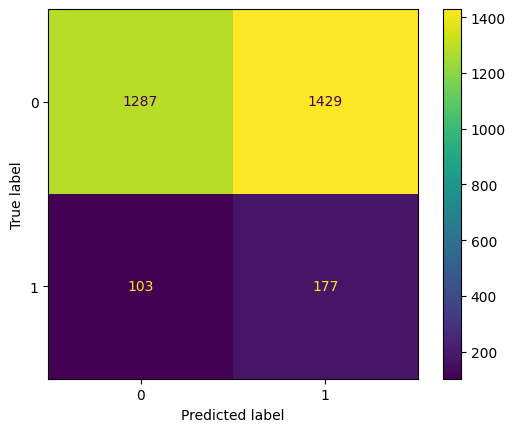

In [51]:
y_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

print("Confusion Matrix of the time-aware model:")
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred
)
plt.show()

The model achieved only 48.8% efficacy.

**Cross validation** will confirm if the low accuracy was due to the specific split used or to the model itself.

In [52]:
tscv = TimeSeriesSplit(n_splits=5)

scores = cross_val_score(
    pipe,
    X,
    y,
    cv=tscv,
    scoring="accuracy"
)

print("Scores:", scores)
print("Mean accuracy:", scores.mean())
print("Std deviation:", scores.std())

Scores: [0.65785256 0.48076923 0.56690705 0.46674679 0.515625  ]
Mean accuracy: 0.5375801282051282
Std deviation: 0.0693576154246228


After correcting to a time-aware validation strategy, model performance dropped to near chance level. Cross-validation confirmed an average accuracy of approximately 54% percent, suggesting that when temporal leakage is removed the model does not generalise well.

This result suggests that the high accuracy obtained earlier with the train-test split was due to temporal leakage. When evaluated across time blocks, the model does not generalise well, indicating that the current features do not capture stable patterns distinguishing eye state. Improved feature engineering or alternative models may be required.

# Conclusion

This project explored the use of machine learning models to predict eye state from EEG signals using the EEG Eye State dataset. Initial results obtained with a random train-test split showed high accuracy, but further analysis with time-based cross-validation produced accuracy close to 53%, only slightly above chance level.

This difference indicates that temporally adjacent EEG samples are highly similar, which can inflate performance when the data is randomly split. When evaluated using time-aware methods, the model showed limited ability to generalise across time.

The project demonstrates the importance of appropriate validation strategies in neuroscience machine learning. Future work could include improved feature extraction, such as frequency-band features or windowed statistics, and evaluation on datasets with subject-level information to better assess generalisation.

